### DBSCAN vs KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
blobs = pd.read_csv('cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

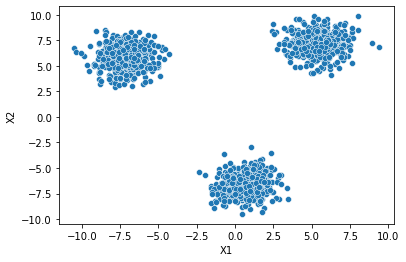

In [4]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [5]:
moon = pd.read_csv('cluster_moons.csv')

In [6]:
moon.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

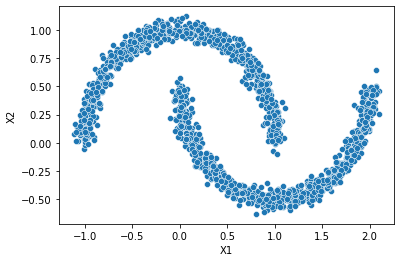

In [7]:
sns.scatterplot(data=moon,x='X1',y='X2')

In [8]:
circles = pd.read_csv('cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

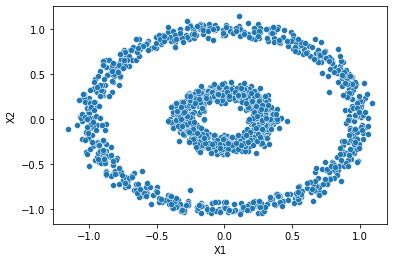

In [10]:
sns.scatterplot(data=circles,x='X1',y='X2')

In [11]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette = 'Set1')

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=3)

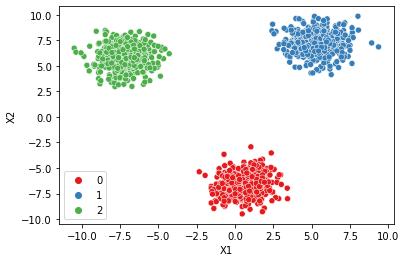

In [14]:
display_categories(model,blobs)

In [15]:
model = KMeans(n_clusters=2)

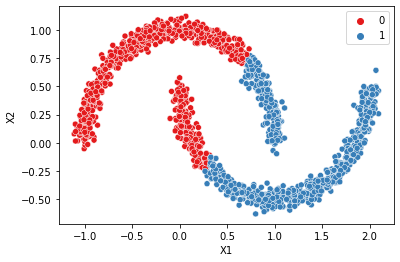

In [16]:
display_categories(model,moon)

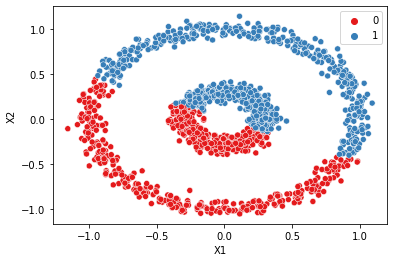

In [17]:
display_categories(model,circles)

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
model = DBSCAN()

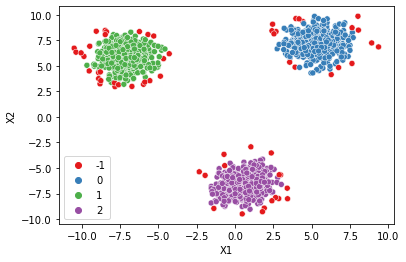

In [20]:
display_categories(model,blobs)

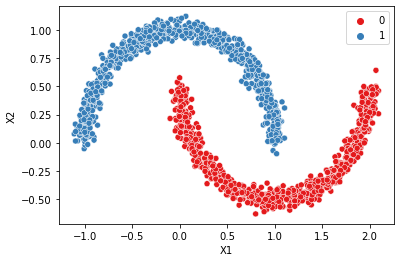

In [22]:
model = DBSCAN(eps=0.15)
display_categories(model,moon)

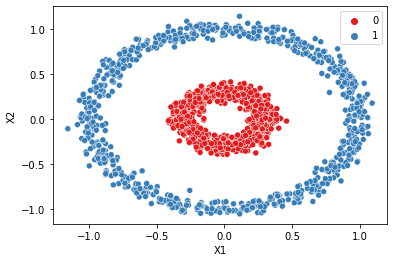

In [27]:
display_categories(model,circles)

### DBSCAN - Hyperparameter Tuning

In [24]:
# two_blobs_cluster
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outlier = pd.read_csv('cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

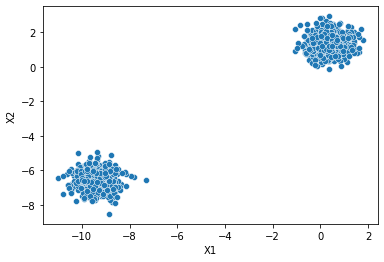

In [25]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

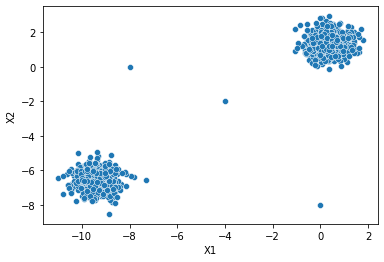

In [26]:
sns.scatterplot(data=two_blobs_outlier,x='X1',y='X2')

In [28]:
dbscan = DBSCAN()

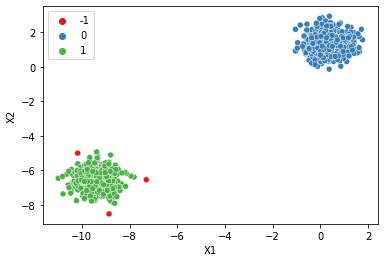

In [29]:
display_categories(dbscan,two_blobs)

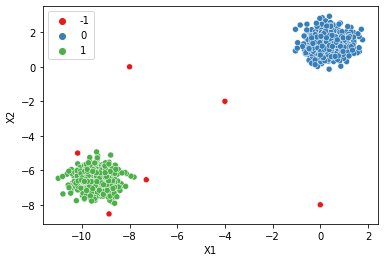

In [30]:
display_categories(dbscan,two_blobs_outlier)

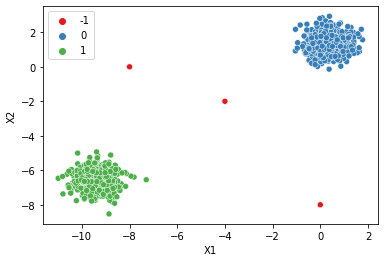

In [31]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outlier)

In [33]:
# Total Outliers Found
np.sum(dbscan.labels_ == -1)

3

In [34]:
# Percent of Points classified as outliers
100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)

0.29910269192422734

In [35]:
len(dbscan.labels_)

1003

In [36]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outlier)
    
    # Total Outliers Found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Percent of Points classified as outliers
    perc_outliers = 100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

<AxesSubplot:>

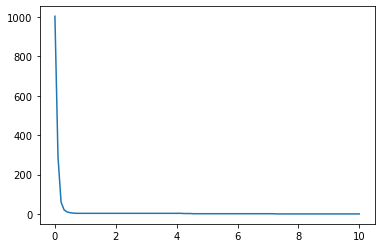

In [37]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)

In [39]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,7,200):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outlier)
    
    # Total Outliers Found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Percent of Points classified as outliers
    perc_outliers = 100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

(0.0, 2.0)

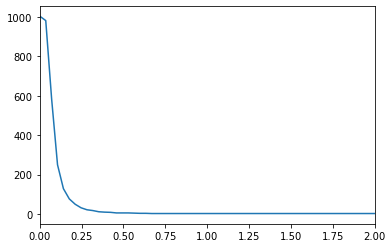

In [41]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers)
plt.xlim(0,2)

Text(0, 0.5, 'Percent of Points Classified as Outliers')

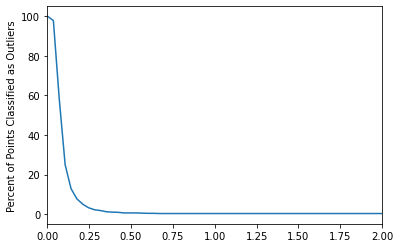

In [45]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.xlim(0,2)
plt.ylabel('Percent of Points Classified as Outliers')

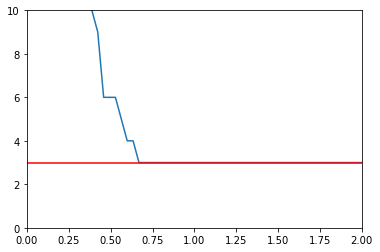

In [44]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

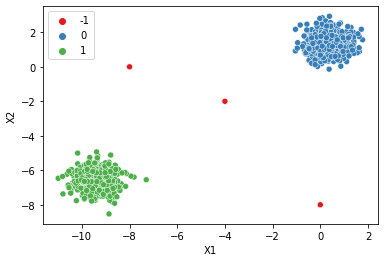

In [46]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outlier)

In [49]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,1,100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outlier)
    
    # Total Outliers Found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Percent of Points classified as outliers
    perc_outliers = 100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

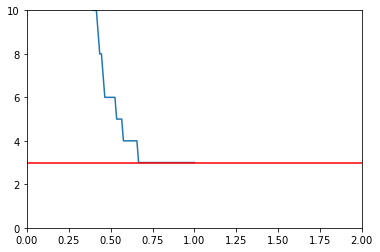

In [50]:
sns.lineplot(x=np.linspace(0.001,1,100),y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

Text(0, 0.5, 'Percent of Points Classified as Outliers')

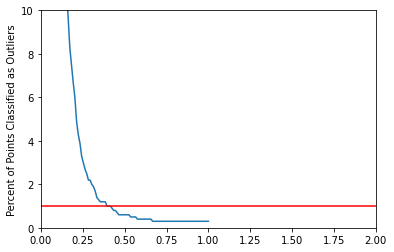

In [51]:
sns.lineplot(x=np.linspace(0.001,1,100),y=outlier_percent)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=1,xmin=0,xmax=2,color='red')
plt.ylabel('Percent of Points Classified as Outliers')

In [53]:
outlier_percent = []
number_of_outliers = []

for n in np.arange(1,100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outlier)
    
    # Total Outliers Found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Percent of Points classified as outliers
    perc_outliers = 100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

Text(0, 0.5, 'Percent of Points Classified as an Outliers')

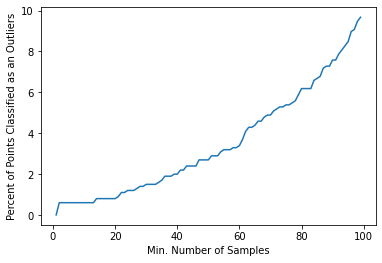

In [55]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.xlabel('Min. Number of Samples')
plt.ylabel('Percent of Points Classified as an Outliers')

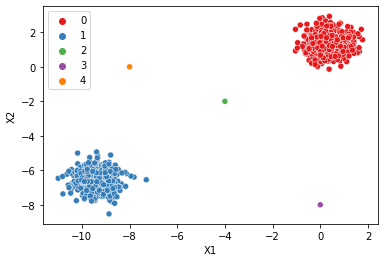

In [56]:
dbscan = DBSCAN(min_samples=1,eps=0.75)
display_categories(dbscan,two_blobs_outlier)

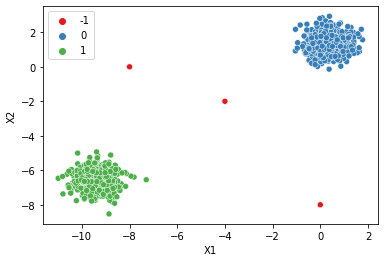

In [57]:
num_dim = two_blobs_outlier.shape[1]
dbscan = DBSCAN(min_samples=1*num_dim,eps=0.75)
display_categories(dbscan,two_blobs_outlier)